## Prepare modules and data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# read data.
cancer_df = pd.read_csv('data/cancer.csv')

In [3]:
# cheack data shape.
print('cancer df shape: {}'.format(cancer_df.shape))

cancer df shape: (569, 33)


In [4]:
# show data.
cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# delete unnecessary data.
cancer_df.drop('Unnamed: 32', axis=1, inplace=True)

In [6]:
# extracting the target variable
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)

In [7]:
# extracting explanatory variables
X = cancer_df.loc[:, 'radius_mean':]

In [8]:
# split the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# standardize data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Logistic regression.
logistic = LogisticRegressionCV(cv=10, random_state=0, max_iter=1000)
logistic.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [11]:
# verification
print('Train score: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


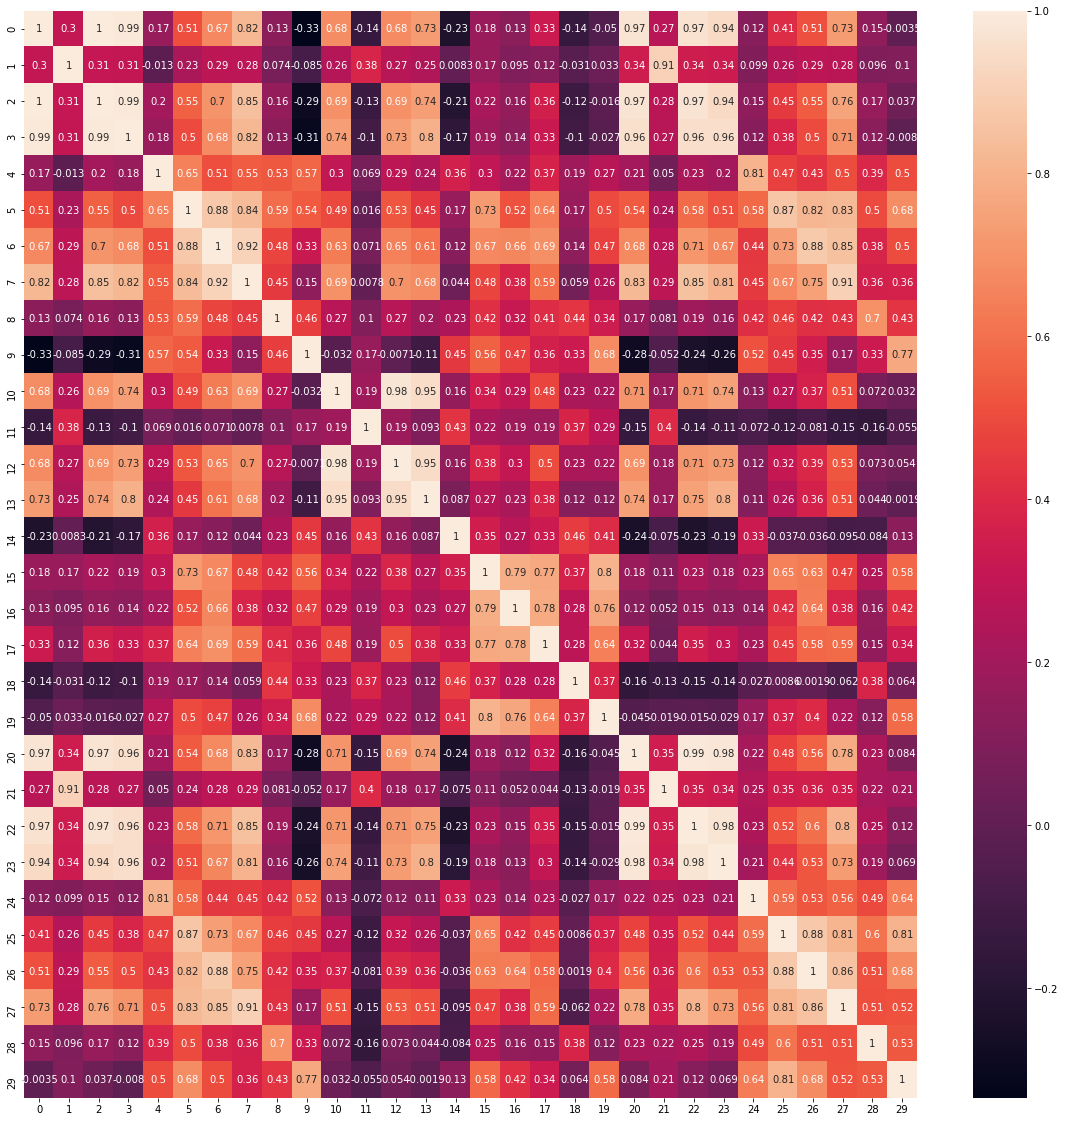

In [12]:
# Draw correlations between variables.
plt.figure(figsize=(20, 20))
seaborn.heatmap(pd.DataFrame(X_train_scaled).corr(), annot=True)

<BarContainer object of 30 artists>

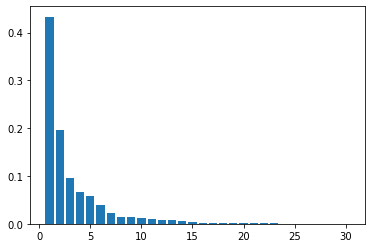

In [13]:
# Principal component analysis is performed with a dimensionality of 30.
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [14]:
# Compression to dimension 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))

X_train_pca shape: (426, 2)


In [15]:
# contribution rate
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

explained variance ratio: [0.43315126 0.19586506]


Text(0, 0.5, 'PC 2')

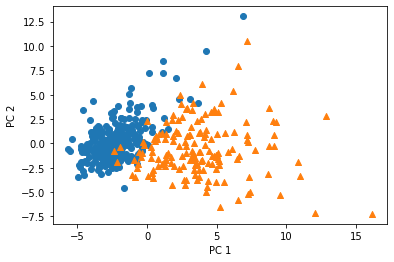

In [16]:
# Plotted on a scatter plot
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') 
plt.scatter(x=m[0], y=m[1], marker='^')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [17]:
# Creating a Pipeline
pca_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('decomposition', PCA(n_components=2)),
    ('model', LogisticRegressionCV(cv=10, random_state=0))
])


In [18]:
# Standardization, dimensional compression and learning
pca_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decomposition',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=10,
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=100, multi_class='auto',
                                      n_jobs=None, penalty='l2', random_state=0,
                                      refit=True, scoring=None, solver='lbfgs',
                                      tol=0.0001, verbose=0))],
         verbose=False)

In [19]:
# verification
print('Train score: {:.3f}'.format(pca_pipeline.score(X_train, y_train)))
print('Test score: {:.3f}'.format(pca_pipeline.score(X_test, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=pca_pipeline.predict(X_test))))

Train score: 0.965
Test score: 0.937
Confustion matrix:
[[84  6]
 [ 3 50]]


model intercept: [-0.30694316]
model coef : [[ 1.78050858 -0.92218849]]
y = x*1.9307425785710486 + -0.3328421076224521


Text(0, 0.5, 'PC 2')

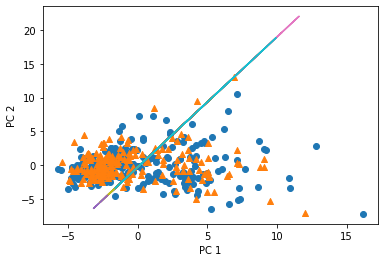

In [20]:
# Intercept and slope
intercept = pca_pipeline.steps[2][1].intercept_
coef = pca_pipeline.steps[2][1].coef_
print('model intercept: {}'.format(intercept))
print('model coef : {}'.format(coef))

# Plot the decision boundary
plt.plot(X_train_scaled, -(X_train_scaled*coef[0][0] + intercept[0])/coef[0][1])
print('y = x*{} + {}'.format(-coef[0][0]/coef[0][1], -intercept[0]/coef[0][1]))

# Plotted on a scatter plot
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o')
plt.scatter(x=m[0], y=m[1], marker='^')
plt.xlabel('PC 1')
plt.ylabel('PC 2')